# Indicateur de probabilité de récession

Ce notebook visualise la sortie du script `src/recession_indicator.py` (probabilités Markov, Kalman et blend).


In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

recession_path = Path("..") / "data" / "processed" / "recession_prob.csv"
probs = pd.read_csv(recession_path, parse_dates=["date"]).set_index("date")
probs.round(2).tail()


,recession_prob,reprise_prob,boom_prob,ralentissement_prob,cycle_phase,markov_prob,kalman_prob,blended_prob
date,,,,,,,,
2025-07-31,0.05,0.94,0.0,0.01,reprise_prob,0.05,0.28,0.16
2025-08-31,0.05,0.94,0.0,0.01,reprise_prob,0.05,0.27,0.16
2025-09-30,0.05,0.94,0.0,0.01,reprise_prob,0.05,0.25,0.14
2025-10-31,0.05,0.94,0.0,0.01,reprise_prob,0.05,0.17,0.11
2025-11-30,0.05,0.94,0.0,0.01,reprise_prob,0.05,0.17,0.11


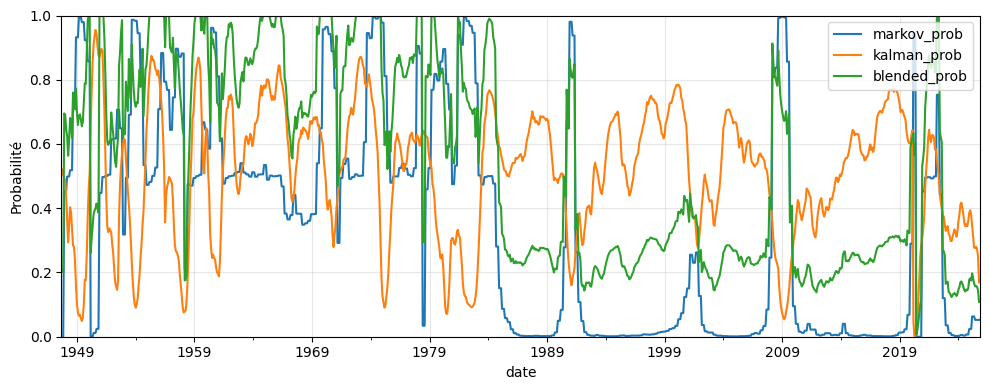

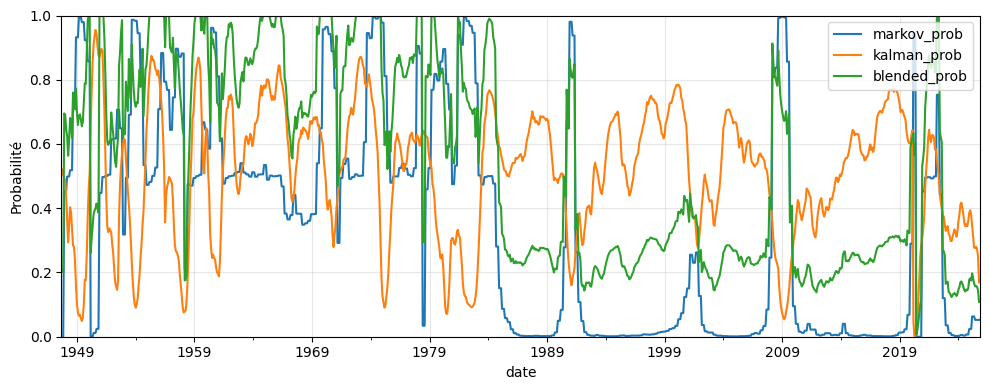

In [2]:
fig, ax = plt.subplots(figsize=(10, 4))
probs[["markov_prob", "kalman_prob", "blended_prob"]].plot(ax=ax)
ax.set_ylabel("Probabilité")
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)
fig.tight_layout()
fig


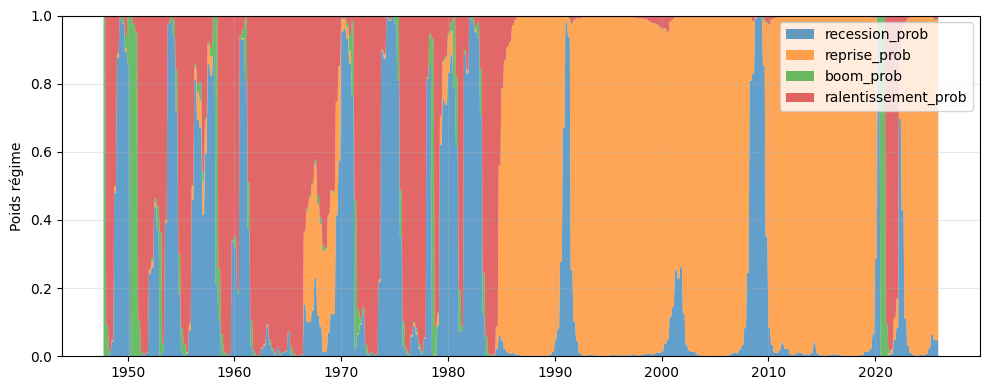

In [3]:
regime_cols = ["recession_prob", "reprise_prob", "boom_prob", "ralentissement_prob"]
if all(c in probs.columns for c in regime_cols):
    fig, ax = plt.subplots(figsize=(10, 4))
    values = [probs[c] for c in regime_cols]
    ax.stackplot(probs.index, *values, labels=regime_cols, alpha=0.7)
    ax.set_ylabel("Poids régime")
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper right")
    fig.tight_layout()
    fig
else:
    "Regimes missing"

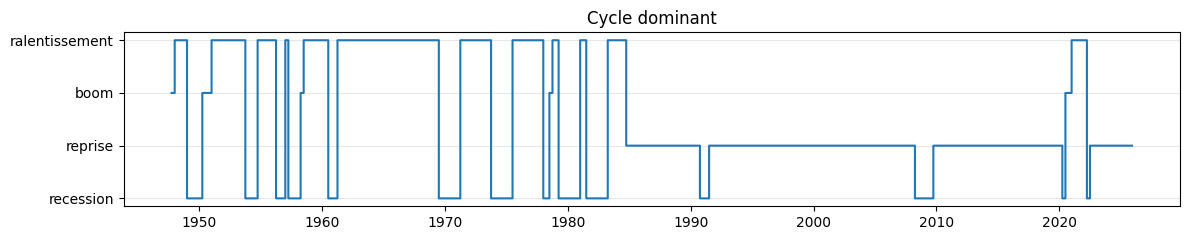

In [4]:
if "cycle_phase" in probs.columns:
    phase = probs["cycle_phase"].dropna().str.replace("_prob", "", regex=False)
    categories = ["recession", "reprise", "boom", "ralentissement"]
    cat = pd.Categorical(phase, categories=categories, ordered=True)
    fig, ax = plt.subplots(figsize=(12, 2.5))
    ax.step(phase.index, cat.codes, where="post")
    ax.set_yticks(range(len(categories)))
    ax.set_yticklabels(categories)
    ax.set_title("Cycle dominant")
    ax.grid(True, axis="y", alpha=0.3)
    fig.tight_layout()
    fig
else:
    "cycle_phase column missing"


In [5]:
latest = probs.iloc[-1]
latest


recession_prob             0.047096
reprise_prob               0.939265
boom_prob                  0.002972
ralentissement_prob        0.010667
cycle_phase            reprise_prob
markov_prob                 0.05243
kalman_prob                0.168905
blended_prob               0.107876
Name: 2025-11-30 00:00:00, dtype: object